# Homework 1 correction

## Exersice 3: Virus test

A medical company is assessing a newly developed test for a certain virus. 
The so called false negative rate is small: 
if you have contracted the virus, the probability that the test returns a positive result
is $0.999$ .
The false positive rate is also small: if you do not have the virus, the probability that the 
test returns a positive result is only $0.005$. 
Assume that $2 \%$ of the population has contracted the virus.
If a person chosen uniformly from the population is tested and the result comes back positive, what is the probability that the person has the virus?
  
**python**: Draw $N = 10^4$ pseudo random samples representing the infection status of $N$ individuals. Use these samples and the statistics described above for the virus test to draw pseudo random samples representing a positive or negative virus test for each individual and verify your results from above.   

### Solution:

We have the following information from the text:

$$
    \Pr[+|v] = 0.999
$$

$$
    \Pr[+|nv] = 0.005
$$

From Bayes Theorem we have that 

$$
    \Pr[v|+] 
    = \frac{ \Pr[+|v] \Pr[v] }{ \Pr[+] }
    = \frac{ \Pr[+|v] \Pr[v] }{ \sum_{x \in \{ v,nv \}} \Pr[+|x] \Pr[x] } 
    = \frac{ \Pr[+|v] \Pr[v] }{ \Pr[+|v] \Pr[v] +  \Pr[+|nv] \Pr[nv] } 
    = \frac{0.999 \cdot 0.02}{ 0.999 \cdot 0.02 + 0.005 \cdot 0.98 } \approx 0.803 
$$

In [9]:
import numpy as np

N = int(1e4)
virus = np.random.choice(['v','nv'], N, p=[ 0.02 , 0.98 ])
test = np.empty(N,dtype=virus.dtype)

for i in range(N):
    if virus[i] == 'v':
        test[i] = np.random.choice(['+','-'],p=[0.999,0.001])
    else:
        test[i] = np.random.choice(['+','-'],p=[0.005,0.995])

n_pos = np.count_nonzero(test == '+')
n_v_and_pos = np.count_nonzero( (virus == 'v')*(test == '+') )

p_v_given_pos = n_v_and_pos/n_pos

print(p_v_given_pos)

0.8260869565217391


## Exersice 7: Group Testing

A blood test is to be performed on $n$ individuals.
Each person can be tested separately, but this is expensive.
An alternative strategy is to pool and analyze together the 
samples of $k$ people.
If the test is negative, this one test suffices for the group of $k$ people.
If the test is positive, then each of the $k$ persons must be tested
individually, which results in $k+1$ total tests for the $k$ people.
Suppose we create $n/k$ disjoint groups of $k$ people (where $k$ divides $n$)
and use the pooling method.
Assume that each person has positive result on the test independently with probability $p$.
* What is the probability that the test for a pooled sample of $k$ people will be positive? What is the expected number of tests necessary? **python**: Confirm your calculations by drawing $n = 10^2$ pseudo random test results and dividing the test results into groups of $k = 10$ with $p \in \{0.02,0.2,0.6\}$. Average your results over $10^4$ iterations.  
* Describe how to find the best value of $k$. Derive an approximation assuming $p$ is close to $0$. **python**: Find the optimal integer $k$ for $p \in \{0.02,0.2,0.6\}$ by assuming $k < 100$. Compare with your approximation. When does the approxiamtion hold? Why do you think this is? 
* For which values of $p$ is pooling better than just testing every individual? Again, derive an approximation assuming $p$ is small and plug in your approximation of the best value of $k$. **python**: Using your results from the previous parts, test if pooling is better or not for $n = 10^2$, $0.01 \leq p \leq 0.5$ and the best integer value of $k$ (assume $k< 100$). Compare with your approximation.


### Solution:
* There is only one way for the test to be negative: if all the samples in the test are negative. Hence
$$
    \Pr[\text{neg}] = (1-p)^k \quad \Rightarrow \quad \Pr[\text{pos}] = 1 - (1-p)^k. 
$$
Let $X_{i}$ be the number of tests that need to be performed for pool $i$ and $X = \sum_i X_i$ the total number of tests. Then
$$
    \text{E}[X_i] = 1\cdot\Pr[\text{neg}] + (k+1)\cdot\Pr[\text{pos}] = k+1-k(1-p)^k
$$
and 
$$
    \text{E}[X] = \frac{n}{k} \text{E}[X_i] = n + \frac{n}{k} - n(1-p)^k
$$

In [16]:
import numpy as np

p = np.array([0.02,0.2,0.6])
k = 10
n_iter = int(1e4)
n_tests = int(1e2)
n_gr = int(n_tests/k)

tests = np.empty((p.size,n_iter,n_tests))
pooled_tests = np.zeros((p.size,n_iter,n_gr))

for i in range(p.size):
    tests[i,:,:] = np.random.choice(2,(n_iter,n_tests),p=[1-p[i],p[i]])
for j in range(n_gr):
    pooled_tests[:,:,j] = np.sum(tests[:,:,k*j:k*(j+1)],axis=-1)

pooled_tests[pooled_tests>0] = k

X = np.sum(pooled_tests + 1, axis=-1)

Ex_X_emp = np.mean(X,axis=-1)

Ex_X = n_tests + n_tests/k - n_tests*(1-p)**k

print('Theoretical expectation: ' + str(Ex_X))
print('Emperical expectation: ' + str(Ex_X_emp))


Theoretical expectation: [ 28.29271931  99.26258176 109.98951424]
Emperical expectation: [ 28.502  99.149 109.984]


* We find the best value of $k$ by setting the derivative of the expected number of tests equal to zero and solving for k. 

Let 
$$
    f(k) = 1 + \frac{1}{k} - (1 - p)^k \quad \Rightarrow \quad f'(k) = \frac{-1}{k^2} - \ln(1-p) (1-p)^k.
$$
Setting the derivative equal zero results in is 
$$
    \frac{1}{k^2} = - \ln(1-p) (1-p)^k.
$$
A Taylor expansion around 0 of the RHS for small $p$ gives
$$
    -\ln(1-p) (1-p)^k \approx 0 + p \cdot \left[ \frac{\partial}{\partial p} - \ln(1-p) (1-p)^k \right]_{p=0} = p
$$
and thus
$$
    k_\text{opt} \approx \frac{1}{\sqrt{p}}
$$

We can do a quick visual inspection by plotting for a couple different $k$

Optimal integer k: [  8   3 100]
Approx best k: [7.07106781 2.23606798 1.29099445]


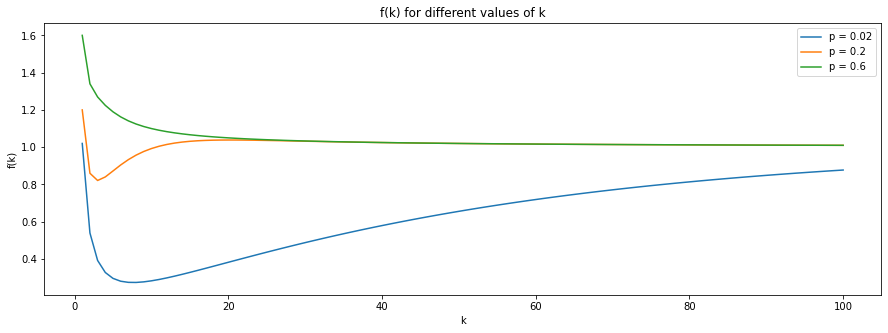

In [17]:
import matplotlib.pyplot as plt

k = (np.arange(100)+1)
f_k = 1 + 1/k - np.power.outer(1-p,k)   

k_opt = k[np.argmin( f_k , axis = 1)]
k_opt_approx = 1/np.sqrt(p)

print('Optimal integer k: ' + str(k_opt))
print('Approx best k: ' + str(k_opt_approx))

fig = plt.figure(figsize = [15,5])
plt.plot(k,np.transpose(f_k))
plt.xlabel('k')
plt.ylabel('f(k)')
plt.legend(['p = ' + str(p[0]),'p = ' + str(p[1]),'p = ' + str(p[2])])
plt.title('f(k) for different values of k')
plt.show()


From the above visualisation we see that as expected for small values of $p$ the approximation works quite well (although not optimally). For larger $p$ it is also able to predict the best $k$, although with a larger percentual offset. When $p$ gets too large we can visually confirm that the the minimum disappears, hence the approximation breaks down. 

* Without pooling we have n tests no matter what. With pooling and the optimal $k$ we have 
$$
    n (\frac{1}{k_\text{opt}} + 1 - (1-p)^{k_\text{opt}}) \approx n (\frac{1}{k_\text{opt}} + 1 - (1-k_\text{opt} p)) \approx 2 n \sqrt{p}
$$
Hence an approximative condition for pooling to be better is $2 \sqrt{p} < 1 $ or $p < 0.25$. 

We check this in the follwing script: (note pooling is favorable if f(k,p) < 1)

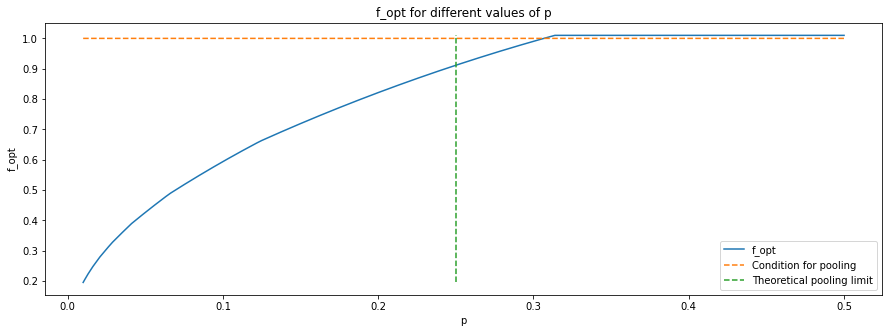

In [18]:
p = np.linspace(0.01,0.5,int(1e4))

k = (np.arange(100)+1)
f = 1 + 1/k - np.power.outer((1-p),k)
# Condition for pooling to be better is f_k < 1

k_opt = k[np.argmin(f,axis = 1 )]

f_opt = 1 + 1/k_opt - np.power((1-p),k_opt)

fig = plt.figure(figsize = [15,5])
plt.plot(p,f_opt)
plt.plot(p,np.ones(p.shape),'--')
plt.plot([0.25,0.25],[np.amin(f_opt),np.amax(f_opt)],'--')
plt.xlabel('p')
plt.ylabel('f_opt')
plt.legend(['f_opt','Condition for pooling', 'Theoretical pooling limit'])
plt.title('f_opt for different values of p')
plt.show()